# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

# Import Datasets

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = pd.DataFrame(boston['data'],columns=boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = pd.Series(boston['target'])
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [6]:
target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CRIM,float64,0,0.0,504,"[0.6147, 0.03548]"
1,ZN,float64,0,0.0,26,"[22.0, 85.0]"
2,INDUS,float64,0,0.0,76,"[2.24, 8.56]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.389, 0.453]"
5,RM,float64,0,0.0,446,"[5.878, 5.851]"
6,AGE,float64,0,0.0,356,"[27.6, 52.9]"
7,DIS,float64,0,0.0,412,"[2.1329, 3.0665]"
8,RAD,float64,0,0.0,9,"[5.0, 8.0]"
9,TAX,float64,0,0.0,66,"[224.0, 337.0]"


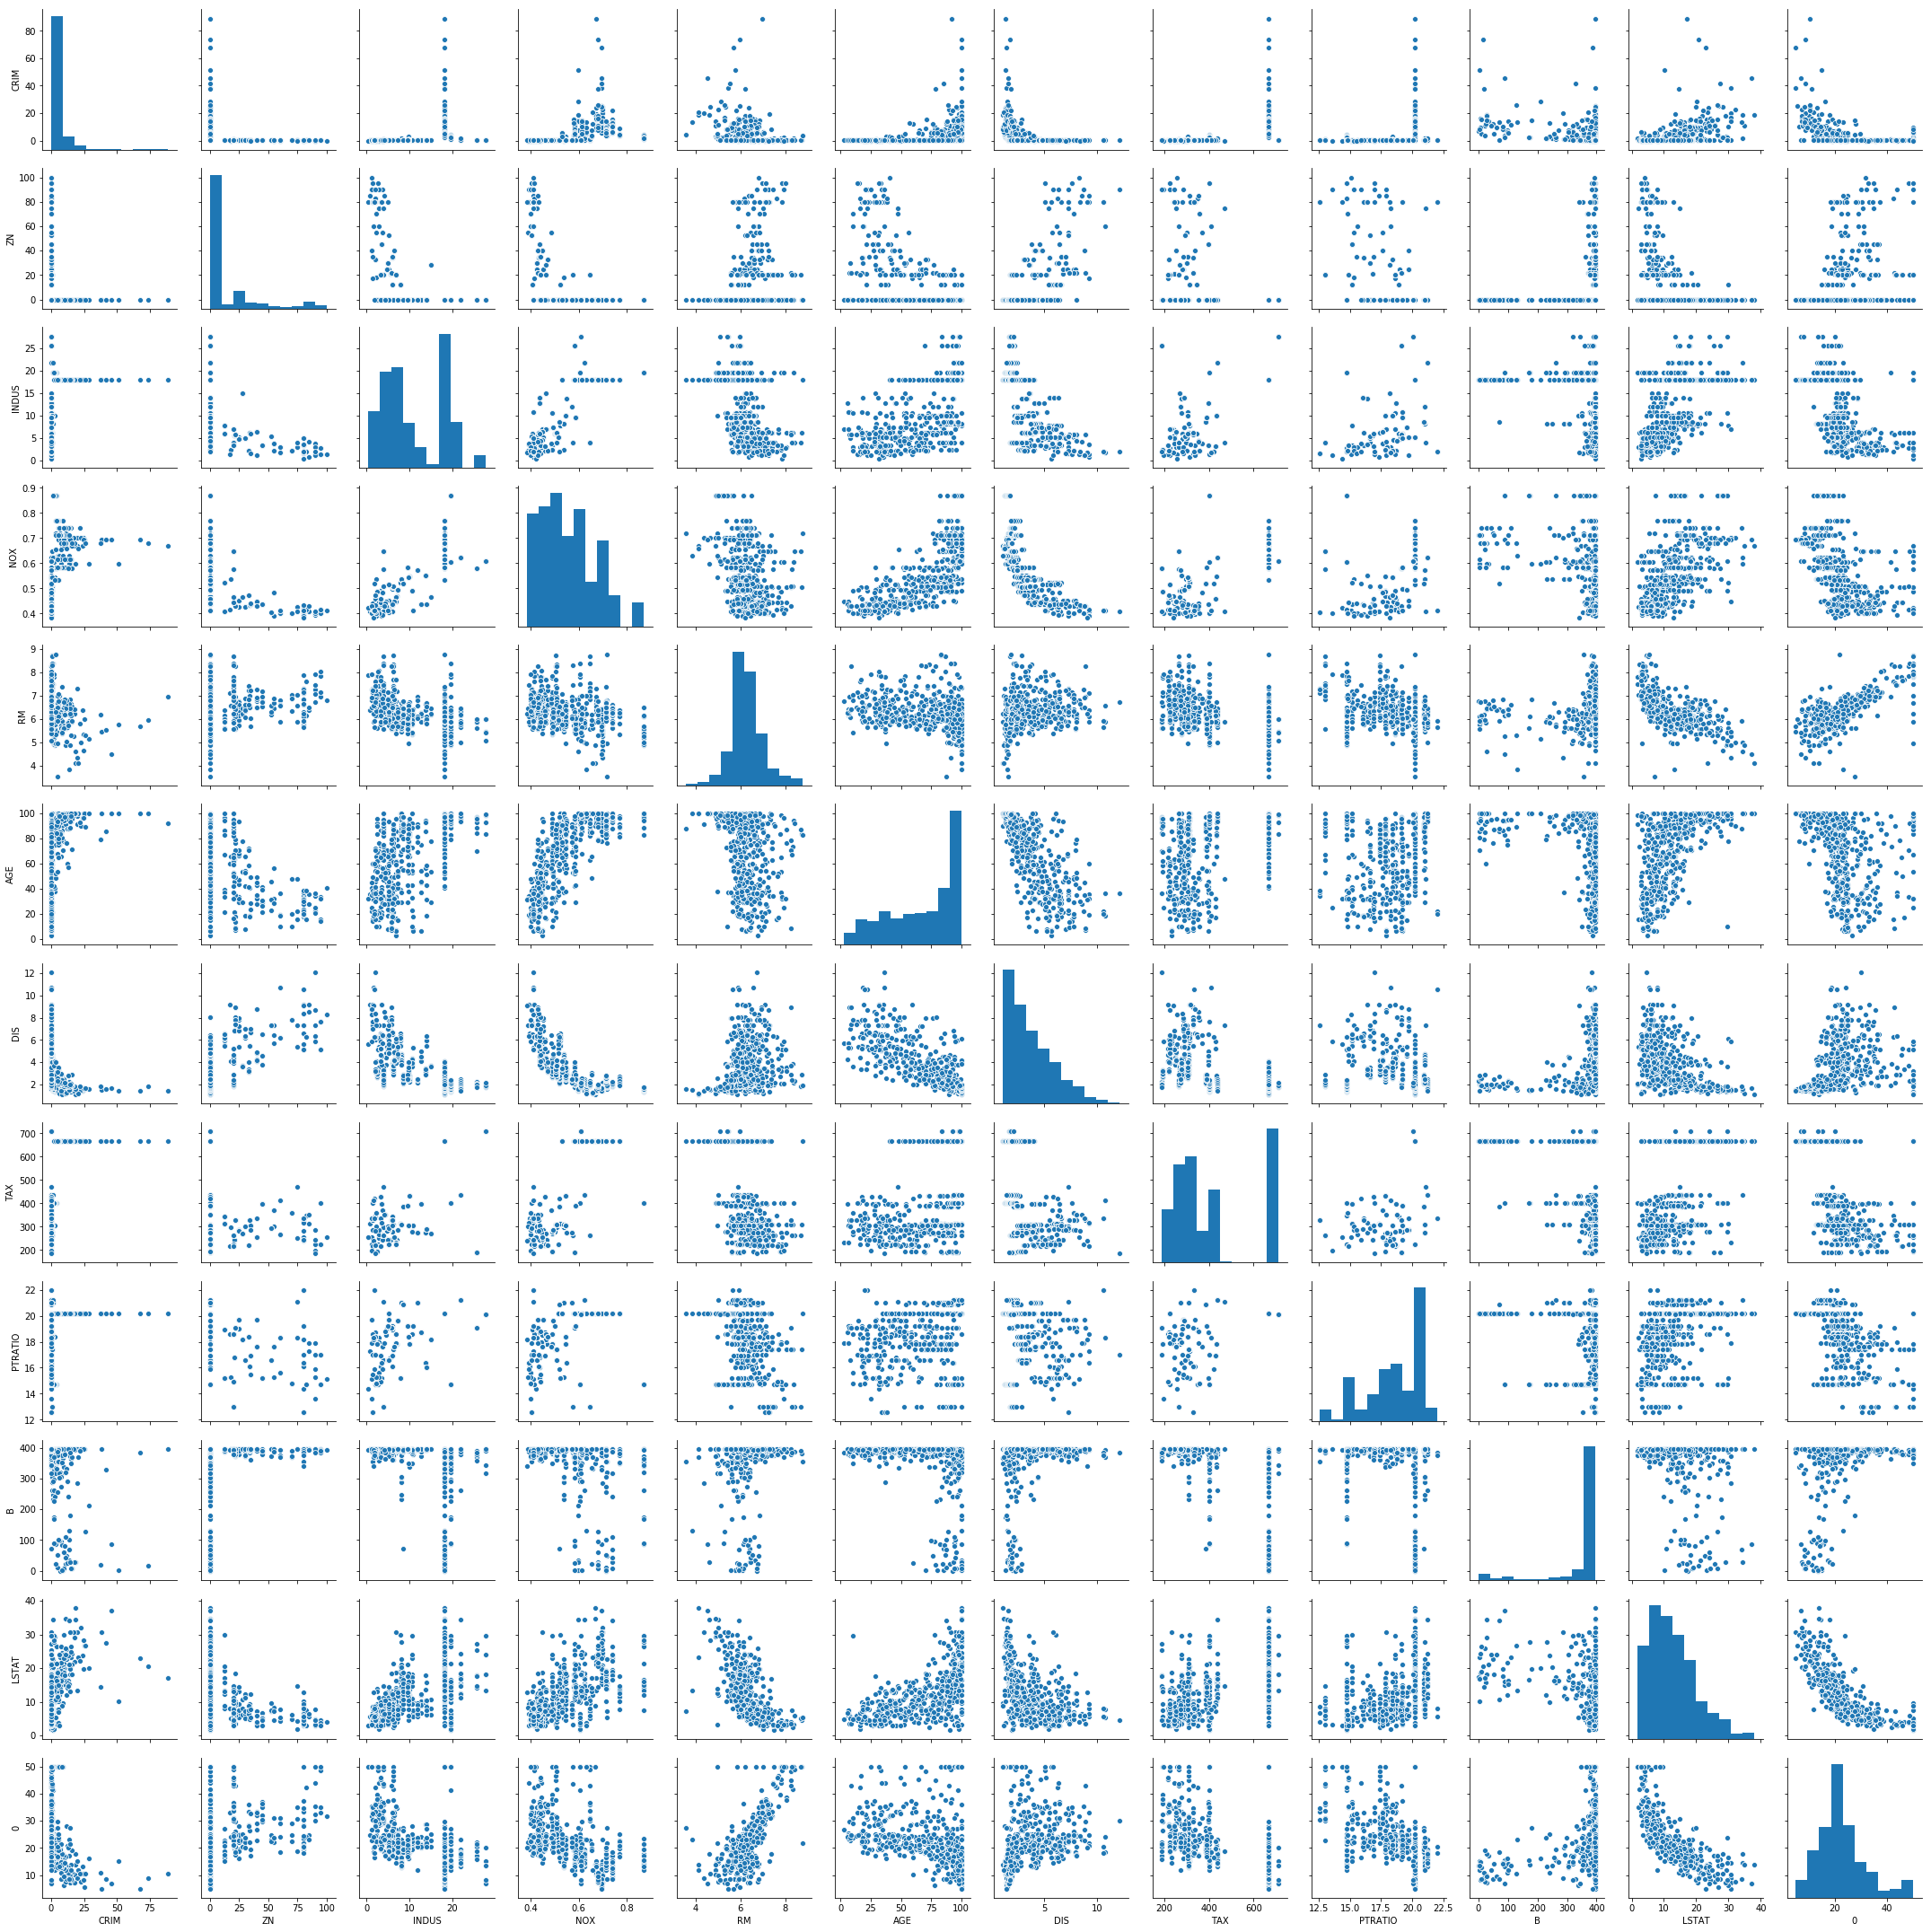

In [10]:
sns.pairplot(pd.concat([data.drop(['CHAS','RAD'], axis=1),target], axis=1))

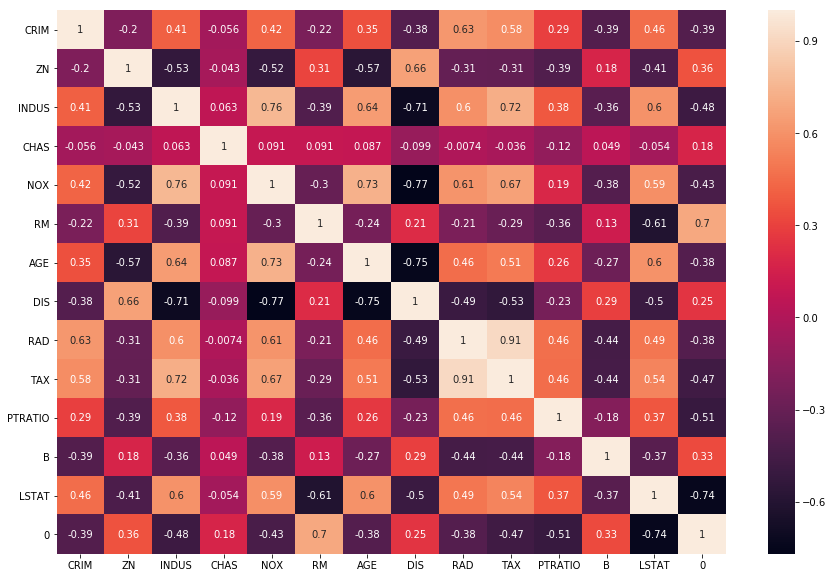

In [11]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(pd.concat([data,target], axis=1).corr(), annot=True)

# Feature Engineering

In [12]:
# data = data.drop(['RAD','CHAS','ZN'], axis=1)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,
                                                    test_size=0.30, random_state=101)

In [14]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
86,0.05188,0.0,4.49,0.0,0.4490,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40


In [15]:
X_train.shape

(354, 13)

# Linear Regression Testing

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print(lm.intercept_)

40.2189290125508


In [29]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


### Training Error

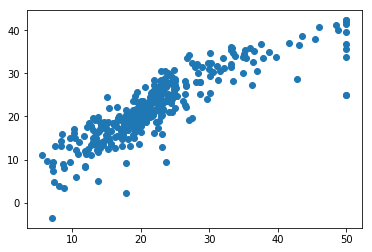

In [19]:
predictions = lm.predict(X_train)
plt.scatter(y_train,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


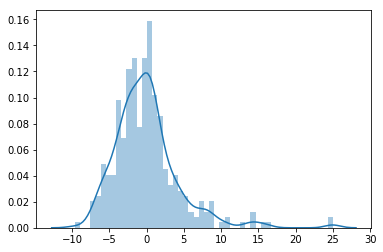

In [20]:
sns.distplot((y_train-predictions),bins=50);

In [21]:
print('MAE:', mean_absolute_error(y_train, predictions))
print('MSE:', mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score :', r2_score(y_train, predictions))

MAE: 3.073138872504538
MSE: 19.475903780713956
RMSE: 4.413151230211124
R2 Score : 0.7471263931918002


In [22]:
sum(abs((predictions - y_train)))/len(y_train)

3.073138872504537

In [23]:
sum(((predictions - y_train) ** 2))/len(y_train)

19.475903780713956

In [24]:
np.sqrt(sum(((predictions - y_train) ** 2))/len(y_train))

4.413151230211124

### Test Error

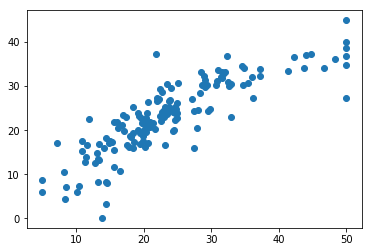

In [25]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


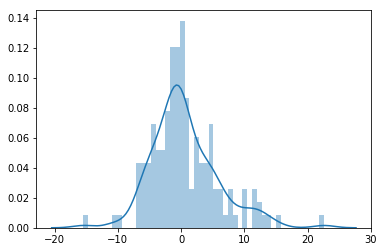

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [27]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score :', r2_score(y_test, predictions))

MAE: 3.835696361418929
MSE: 28.547585271468172
RMSE: 5.342994036256092
R2 Score : 0.7123963332666869


# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

In [98]:
rlm = Ridge(alpha=0.1)

In [99]:
rlm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [100]:
print(rlm.intercept_)

39.18701657347894


In [101]:
coeff_df = pd.DataFrame(rlm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.088109
ZN,0.050465
INDUS,0.014923
CHAS,3.745791
NOX,-16.291746
RM,3.258552
AGE,0.010547
DIS,-1.386904
RAD,0.260425
TAX,-0.010463


### Training Error

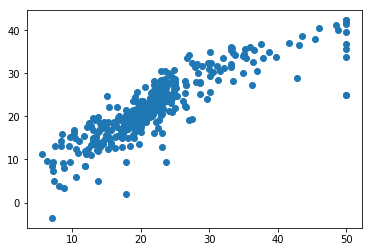

In [102]:
predictions = rlm.predict(X_train)
plt.scatter(y_train,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


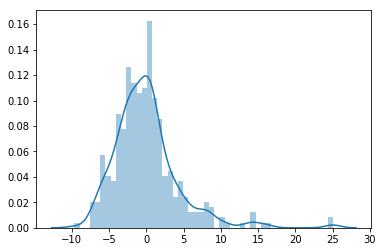

In [103]:
sns.distplot((y_train-predictions),bins=50);

In [104]:
print('MAE:', mean_absolute_error(y_train, predictions))
print('MSE:', mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score :', r2_score(y_train, predictions))

MAE: 3.0694069495763565
MSE: 19.482619834688435
RMSE: 4.4139120782689405
R2 Score : 0.7470391924738686


### Test Error

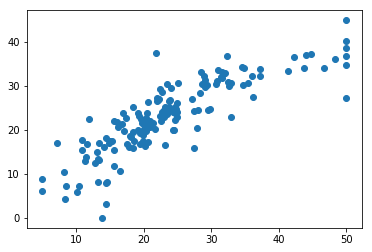

In [105]:
predictions = rlm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


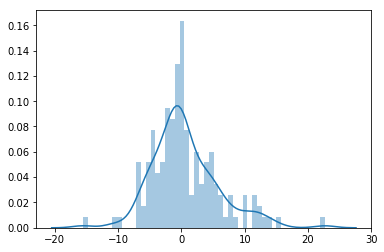

In [106]:
sns.distplot((y_test-predictions),bins=50);

In [107]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score :', r2_score(y_test, predictions))

MAE: 3.8278850982641273
MSE: 28.55789080238322
RMSE: 5.3439583458690265
R2 Score : 0.7122925098276599


# Lasso Regression

In [108]:
from sklearn.linear_model import Lasso

In [109]:
llm = Lasso(alpha=0.1)

In [110]:
llm.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
print(llm.intercept_)

29.406208565417412


In [112]:
coeff_df = pd.DataFrame(llm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.080633
ZN,0.051846
INDUS,-0.028935
CHAS,2.215957
NOX,-0.000000
RM,3.112495
AGE,0.000000
DIS,-1.072913
RAD,0.229585
TAX,-0.012452


### Train Error

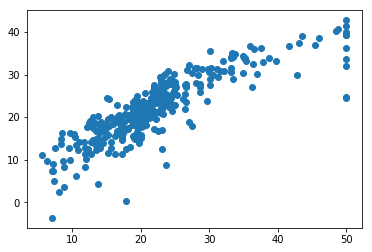

In [113]:
predictions = llm.predict(X_train)
plt.scatter(y_train,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


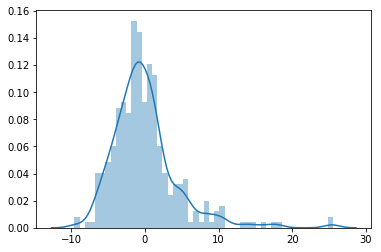

In [114]:
sns.distplot((y_train-predictions),bins=50);

In [115]:
print('MAE:', mean_absolute_error(y_train, predictions))
print('MSE:', mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score :', r2_score(y_train, predictions))

MAE: 3.1377067010367337
MSE: 20.668085360305607
RMSE: 4.54621659848116
R2 Score : 0.7316472010887785


### Test Error

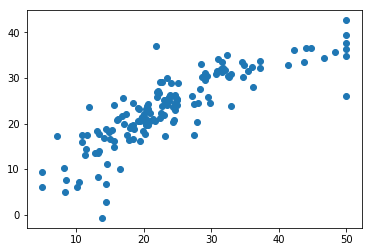

In [116]:
predictions = llm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


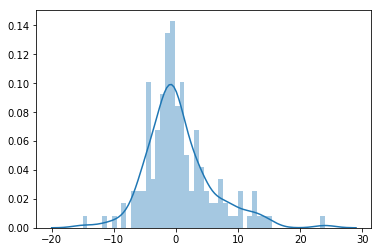

In [117]:
sns.distplot((y_test-predictions),bins=50);

In [118]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score :', r2_score(y_test, predictions))

MAE: 3.8504570356583314
MSE: 29.38574668506564
RMSE: 5.420862171745897
R2 Score : 0.7039522461898744


### Features Importance

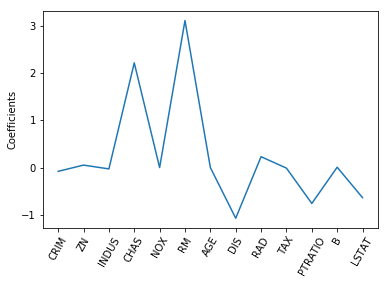

In [119]:
plt.plot(range(len(X_train.columns)), llm.coef_)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.ylabel('Coefficients')
plt.show()

# Gradient Boosting Testing

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
gbr = GradientBoostingRegressor(random_state=101, n_estimators=100, learning_rate=0.1)

In [127]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=101, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### Training Error 

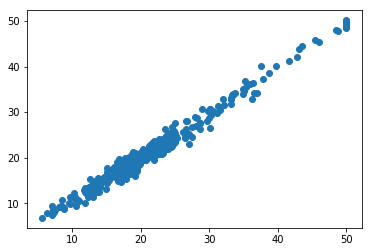

In [128]:
predictions = gbr.predict(X_train)
plt.scatter(y_train,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


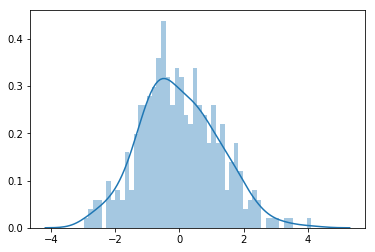

In [129]:
sns.distplot((y_train-predictions),bins=50);

In [130]:
print('MAE:', mean_absolute_error(y_train, predictions))
print('MSE:', mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score :', r2_score(y_train, predictions))

MAE: 0.9778945955502316
MSE: 1.4701514806795035
RMSE: 1.2124980332683033
R2 Score : 0.9809116685079344


### Test Error

In [131]:
predictions = gbr.predict(X_test)

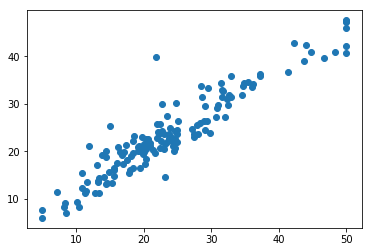

In [132]:
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


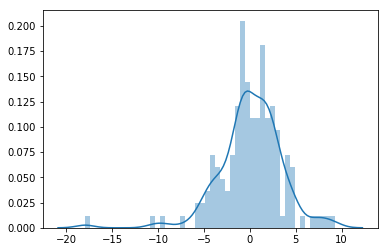

In [133]:
sns.distplot((y_test-predictions),bins=50);

In [134]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score :', r2_score(y_test, predictions))

MAE: 2.4842757917364775
MSE: 11.818736900357871
RMSE: 3.4378389869739205
R2 Score : 0.8809317132648529


### Features Importance

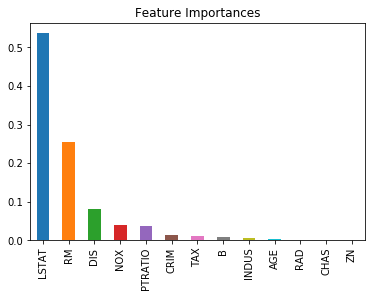

In [135]:
coef1 = pd.Series(gbr.feature_importances_, data.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')

# XGBoost Testing

In [136]:
from xgboost import XGBRegressor

In [144]:
xgbr = XGBRegressor(random_state=101)
xgbr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=101, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [145]:
xgbr.fit(X_train, y_train)


C:\Users\harto\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=101, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

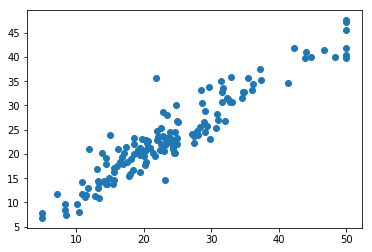

In [146]:
predictions = xgbr.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


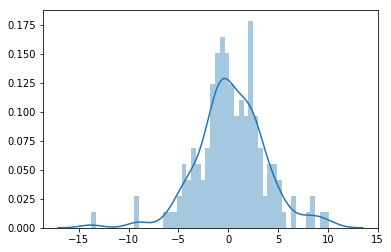

In [140]:
sns.distplot((y_test-predictions),bins=50);

In [141]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 2.571577307425047
MSE: 11.906249389841221
RMSE: 3.4505433470456826


In [142]:
r2_score(y_test, predictions)

0.8800500655660709

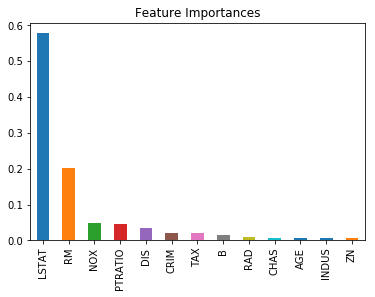

In [143]:
coef1 = pd.Series(xgbr.feature_importances_, data.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')

In [62]:
listItem = [];

for pred, act in zip(predictions, y_test) :
    listItem.append([pred, act, abs(pred-act), abs(pred-act)/act]);
    
dfSelisih = pd.DataFrame(listItem, columns=['Prediction', 'Actual', 'Selisih', 'Selisih %'])
dfSelisih.head()

,Prediction,Actual,Selisih,Selisih %
0,45.531803,50.0,4.468197,0.089364
1,34.717239,36.2,1.482761,0.040960
2,13.158294,11.7,1.458294,0.124640
3,15.230514,14.9,0.330514,0.022182
4,28.527559,30.8,2.272441,0.073781


In [63]:
print('Persentasi prediksi yang menyimpang diatas 20% : ' + str((100 * len(dfSelisih[dfSelisih['Selisih %'] > 0.20])/len(dfSelisih))) + ' %')

Persentasi prediksi yang menyimpang diatas 20% : 13.157894736842104 %


In [64]:
print('MAE : ' + str(sum(dfSelisih['Selisih'])/len(dfSelisih)))

MAE : 2.595349255361055


In [65]:
ser1 = pd.Series(predictions)
ser1.describe()

count    152.000000
mean      23.499411
std        8.541651
min        6.861637
25%       18.679842
50%       22.139956
75%       28.076642
max       47.155685
dtype: float64

# Random Forest Testing

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr = RandomForestRegressor(random_state=101)

C:\Users\harto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


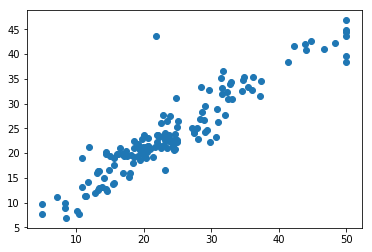

In [68]:
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


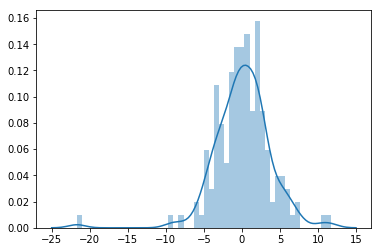

In [69]:
sns.distplot((y_test-predictions),bins=50);

In [70]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 2.655197368421052
MSE: 13.856251973684213
RMSE: 3.722398685482818


In [71]:
r2_score(y_test, predictions)

0.8604046949359603

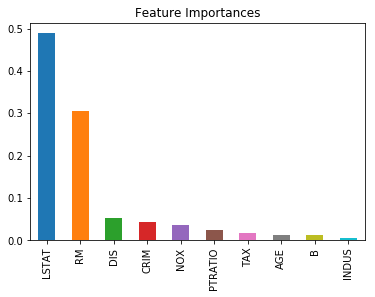

In [72]:
coef1 = pd.Series(rfr.feature_importances_, data.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')

# Deep Learning Testing

In [73]:
import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

C:\Users\harto\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [74]:
len(X_train)

354

In [75]:
model = Sequential()
# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [76]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', 
                             verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [77]:
fitresults = model.fit(X_train, y_train, epochs=250, batch_size=128, 
                       validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 283 samples, validate on 71 samples
Epoch 1/250
283/283 [==============================] - 0s 1ms/step - loss: 430.4247 - mean_squared_error: 430.4247 - val_loss: 83.3741 - val_mean_squared_error: 83.3741

Epoch 00001: val_loss improved from inf to 83.37408, saving model to Weights-001--83.37408.hdf5
Epoch 2/250
283/283 [==============================] - 0s 39us/step - loss: 120.5391 - mean_squared_error: 120.5391 - val_loss: 165.5797 - val_mean_squared_error: 165.5797

Epoch 00002: val_loss did not improve from 83.37408
Epoch 3/250
283/283 [==============================] - 0s 39us/step - loss: 143.6405 - mean_squared_error: 143.6405 - val_loss: 57.4267 - val_mean_squared_error: 57.4267

Epoch 00003: val_loss improved from 83.37408 to 57.42667, saving model to Weights-003--57.42667.hdf5
Epoch 4/250
283/283 [==============================] - 0s 49us/step - loss: 93.1986 - mean_squared_error: 93.1986 - val_loss: 71.7049 - val_mean

Epoch 34/250
283/283 [==============================] - 0s 42us/step - loss: 53.3062 - mean_squared_error: 53.3062 - val_loss: 32.6881 - val_mean_squared_error: 32.6881

Epoch 00034: val_loss improved from 33.73986 to 32.68807, saving model to Weights-034--32.68807.hdf5
Epoch 35/250
283/283 [==============================] - 0s 35us/step - loss: 53.5249 - mean_squared_error: 53.5249 - val_loss: 34.7612 - val_mean_squared_error: 34.7612

Epoch 00035: val_loss did not improve from 32.68807
Epoch 36/250
283/283 [==============================] - 0s 35us/step - loss: 52.4249 - mean_squared_error: 52.4249 - val_loss: 33.2012 - val_mean_squared_error: 33.2012

Epoch 00036: val_loss did not improve from 32.68807
Epoch 37/250
283/283 [==============================] - 0s 42us/step - loss: 50.2784 - mean_squared_error: 50.2784 - val_loss: 31.1698 - val_mean_squared_error: 31.1698

Epoch 00037: val_loss improved from 32.68807 to 31.16976, saving model to Weights-037--31.16976.hdf5
Epoch 38/250
2

283/283 [==============================] - 0s 35us/step - loss: 23.8922 - mean_squared_error: 23.8922 - val_loss: 23.3117 - val_mean_squared_error: 23.3117

Epoch 00068: val_loss did not improve from 20.16757
Epoch 69/250
283/283 [==============================] - 0s 32us/step - loss: 21.9234 - mean_squared_error: 21.9234 - val_loss: 20.6824 - val_mean_squared_error: 20.6824

Epoch 00069: val_loss did not improve from 20.16757
Epoch 70/250
283/283 [==============================] - 0s 42us/step - loss: 19.8161 - mean_squared_error: 19.8161 - val_loss: 20.3844 - val_mean_squared_error: 20.3844

Epoch 00070: val_loss did not improve from 20.16757
Epoch 71/250
283/283 [==============================] - 0s 35us/step - loss: 21.5603 - mean_squared_error: 21.5603 - val_loss: 28.3641 - val_mean_squared_error: 28.3641

Epoch 00071: val_loss did not improve from 20.16757
Epoch 72/250
283/283 [==============================] - 0s 35us/step - loss: 21.6507 - mean_squared_error: 21.6507 - val_loss


Epoch 00140: val_loss did not improve from 17.31127
Epoch 141/250
283/283 [==============================] - 0s 46us/step - loss: 12.3670 - mean_squared_error: 12.3670 - val_loss: 21.2207 - val_mean_squared_error: 21.2207

Epoch 00141: val_loss did not improve from 17.31127
Epoch 142/250
283/283 [==============================] - 0s 35us/step - loss: 16.4016 - mean_squared_error: 16.4016 - val_loss: 17.0872 - val_mean_squared_error: 17.0872

Epoch 00142: val_loss improved from 17.31127 to 17.08715, saving model to Weights-142--17.08715.hdf5
Epoch 143/250
283/283 [==============================] - 0s 49us/step - loss: 12.2623 - mean_squared_error: 12.2623 - val_loss: 18.7774 - val_mean_squared_error: 18.7774

Epoch 00143: val_loss did not improve from 17.08715
Epoch 144/250
283/283 [==============================] - 0s 49us/step - loss: 12.0566 - mean_squared_error: 12.0566 - val_loss: 21.6257 - val_mean_squared_error: 21.6257

Epoch 00144: val_loss did not improve from 17.08715
Epoch 


Epoch 00176: val_loss did not improve from 16.67896
Epoch 177/250
283/283 [==============================] - 0s 49us/step - loss: 10.7599 - mean_squared_error: 10.7599 - val_loss: 18.4551 - val_mean_squared_error: 18.4551

Epoch 00177: val_loss did not improve from 16.67896
Epoch 178/250
283/283 [==============================] - 0s 39us/step - loss: 12.5563 - mean_squared_error: 12.5563 - val_loss: 18.8470 - val_mean_squared_error: 18.8470

Epoch 00178: val_loss did not improve from 16.67896
Epoch 179/250
283/283 [==============================] - 0s 42us/step - loss: 10.0730 - mean_squared_error: 10.0730 - val_loss: 17.4725 - val_mean_squared_error: 17.4725

Epoch 00179: val_loss did not improve from 16.67896
Epoch 180/250
283/283 [==============================] - 0s 32us/step - loss: 10.6528 - mean_squared_error: 10.6528 - val_loss: 18.3662 - val_mean_squared_error: 18.3662

Epoch 00180: val_loss did not improve from 16.67896
Epoch 181/250
283/283 [==============================] 

283/283 [==============================] - 0s 35us/step - loss: 10.3474 - mean_squared_error: 10.3474 - val_loss: 18.8657 - val_mean_squared_error: 18.8657

Epoch 00250: val_loss did not improve from 15.80213


Text(0,0.5,'Loss')

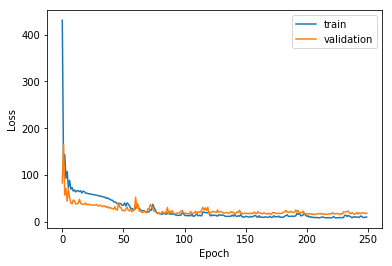

In [78]:
plt.plot(fitresults.epoch,fitresults.history['loss'],label='train')
plt.plot(fitresults.epoch,fitresults.history['val_loss'],label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [79]:
# Load weights file of the best model :
weights_file = 'Weights-192--16.52366.hdf5' # choose the best checkpoint 
model.load_weights(weights_file) # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [80]:
model.save('dlm_boston.h5')

In [81]:
dlm = load_model('dlm_boston.h5')

### Train Error

In [82]:
predictions = dlm.predict(X_train)

In [83]:
predictions.shape

(354, 1)

In [84]:
predictions = predictions.reshape(354)

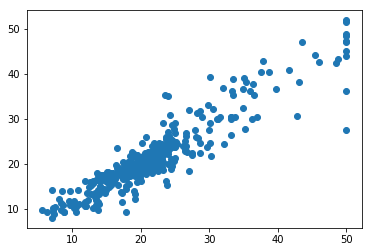

In [85]:
plt.scatter(y_train,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


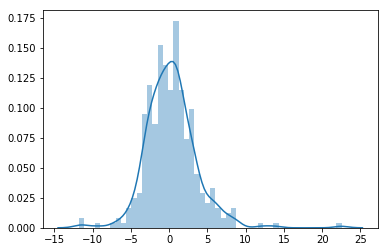

In [86]:
sns.distplot((y_train-predictions),bins=50);

In [87]:
print('MAE:', mean_absolute_error(y_train, predictions))
print('MSE:', mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score :', r2_score(y_train, predictions))

MAE: 2.4085860160784534
MSE: 11.317079499423116
RMSE: 3.3640867259069163
R2 Score : 0.853059927602017


### Test Error

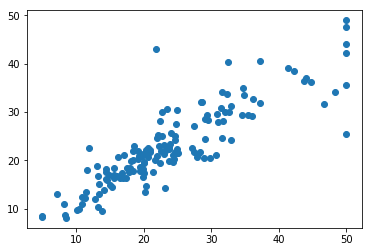

In [88]:
predictions = dlm.predict(X_test)
predictions = predictions.reshape(152)
plt.scatter(y_test,predictions)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


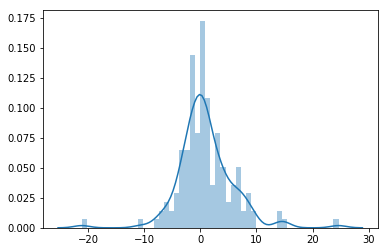

In [89]:
sns.distplot((y_test-predictions),bins=50);

In [90]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score :', r2_score(y_test, predictions))

MAE: 3.415155473508333
MSE: 25.399282642513455
RMSE: 5.039770098180417
R2 Score : 0.7441140204708117
